### Importing required Python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

### Ingesting dataset for analysis

In [2]:
os.chdir('.')

file_path = "onlinefraud.csv"
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='iso-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Observing shape of the dataset

In [3]:
print(f"This dataset has {df.shape[0]} rows")
print(f"This dataset has {df.shape[1]} columns")

This dataset has 6362620 rows
This dataset has 11 columns


### Observing data types

In [4]:
pd.DataFrame(df.dtypes, columns=["DataType"])

,DataType
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


## 1. Determining differences between the rows with isFlaggedFraud=0 and isFlaggedFraud=1

### 1A. Getting counts of rows for each case

In [5]:
print(f"The number of rows in the dataset having isFlaggedFraud=0 are {df['isFlaggedFraud'].value_counts()[0]}")
print(f"The number of rows in the dataset having isFlaggedFraud=1 are {df['isFlaggedFraud'].value_counts()[1]}")

The number of rows in the dataset having isFlaggedFraud=0 are 6362604
The number of rows in the dataset having isFlaggedFraud=1 are 16


### 1B. Separating out rows based on the column isFlaggedFraud

In [6]:
flagged_frauds_df = pd.DataFrame(df[df['isFlaggedFraud']==1])
not_flagged_frauds_df = pd.DataFrame(df[df['isFlaggedFraud']==0])

### 1C. Comparing the minimum & maximum amounts between both cases

In [7]:
print(f"The minimum amount in the dataset within the non flagged transactions subset is {not_flagged_frauds_df['amount'].min()}")
print(f"The minimum amount in the dataset within the flagged transactions subset is {flagged_frauds_df['amount'].min()}")

The minimum amount in the dataset within the non flagged transactions subset is 0.0
The minimum amount in the dataset within the flagged transactions subset is 353874.22


In [8]:
print(f"The maximum amount in the dataset within the non flagged transactions subset is {not_flagged_frauds_df['amount'].max()}")
print(f"The maximum amount in the dataset within the flagged transactions subset is {flagged_frauds_df['amount'].max()}")

The maximum amount in the dataset within the non flagged transactions subset is 92445516.64
The maximum amount in the dataset within the flagged transactions subset is 10000000.0


### 1D. What is the relationship between isFlaggedFraud and isFraud column ?

In [9]:
flagged_frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


#### All 16 flagged transactions were fraud. None of the transactions involved any merchants. 
#### All amounts were higher than 200,000. These transactions were canceled by the system.
#### The documentation says that these transactions should not be considered for further analytics

### Removing the rows with isFlaggedFraud=1 (as recommeded by the dataset's creator)

In [10]:
df = df[df['isFlaggedFraud'] !=1]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
not_frauds_df = pd.DataFrame(df[df['isFraud']==0])
frauds_df = pd.DataFrame(df[df['isFraud']==1])

In [12]:
df['orgCustomerType'] = df['nameOrig'].str[0]
df['destCustomerType'] = df['nameDest'].str[0]

In [13]:
df['orgCustomerType'].value_counts()

C    6362604
Name: orgCustomerType, dtype: int64

In [14]:
df['destCustomerType'].value_counts()

C    4211109
M    2151495
Name: destCustomerType, dtype: int64

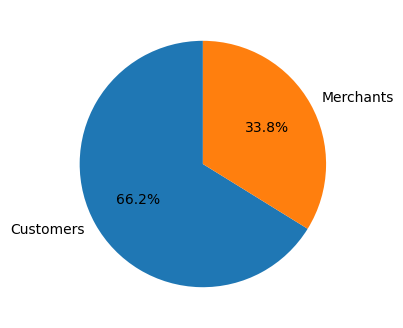

In [15]:
n_counts_c = df['destCustomerType'].value_counts()[0]
n_counts_m = df['destCustomerType'].value_counts()[1]

# Creating dataset
labels = ['Customers', 'Merchants']

data = [n_counts_c, n_counts_m]

# Creating plot
fig = plt.figure(figsize=(5, 4))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)

# show plot
plt.show()

In [16]:
frauds_df['orgCustomerType'] = frauds_df['nameOrig'].str[0]
frauds_df['destCustomerType'] = frauds_df['nameDest'].str[0]

frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,C,C
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,C,C
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,C,C
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,C,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,C,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,C,C


In [17]:
frauds_df['orgCustomerType'].value_counts()

C    8197
Name: orgCustomerType, dtype: int64

In [18]:
frauds_df['destCustomerType'].value_counts()

C    8197
Name: destCustomerType, dtype: int64

In [19]:
not_frauds_df['orgCustomerType'] = not_frauds_df['nameOrig'].str[0]
not_frauds_df['destCustomerType'] = not_frauds_df['nameDest'].str[0]

not_frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0,C,M
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0,C,M
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0,C,M
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0,C,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0,C,M
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0,C,C
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0,C,C
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0,C,C


In [20]:
not_frauds_df['orgCustomerType'].value_counts()

C    6354407
Name: orgCustomerType, dtype: int64

In [21]:
not_frauds_df['destCustomerType'].value_counts()

C    4202912
M    2151495
Name: destCustomerType, dtype: int64

In [22]:
not_frauds_df = not_frauds_df[not_frauds_df['destCustomerType'] != "M"]
not_frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.00,40348.79,0,0,C,C
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.00,157982.12,0,0,C,C
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0,0,C,C
19,1,TRANSFER,215310.30,C1670993182,705.0,0.00,C1100439041,22425.00,0.00,0,0,C,C
21,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.00,16896.70,0,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362317,718,CASH_OUT,317177.48,C857156502,170.0,0.00,C784108220,345042.13,662219.61,0,0,C,C
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0,C,C
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0,C,C
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0,C,C


In [23]:
frauds_df['diff_new_bals'] = frauds_df['newbalanceDest'] - frauds_df['oldbalanceDest']
not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceDest'] - not_frauds_df['oldbalanceDest']

print(f"The average value of diffs in Non-Fraudulent transactions are : {not_frauds_df['diff_new_bals'].mean()}")
print(f"The average value of diffs in Fraudulent transactions are : {frauds_df['diff_new_bals'].mean()}")

The average value of diffs in Non-Fraudulent transactions are : 186727.63768504516
The average value of diffs in Fraudulent transactions are : 736893.5632743661


C:\Users\mcsan\AppData\Local\Temp\ipykernel_3496\1740282389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceDest'] - not_frauds_df['oldbalanceDest']


In [24]:
frauds_df['diff_new_bals'] = frauds_df['newbalanceDest'] - frauds_df['newbalanceOrig']
not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceDest'] - not_frauds_df['newbalanceOrig']

print(f"The average value of diffs in Non-Fraudulent transactions are : {not_frauds_df['diff_new_bals'].mean()}")
print(f"The average value of diffs in Fraudulent transactions are : {frauds_df['diff_new_bals'].mean()}")

The average value of diffs in Non-Fraudulent transactions are : 589481.0665288476
The average value of diffs in Fraudulent transactions are : 1104697.3134732218


C:\Users\mcsan\AppData\Local\Temp\ipykernel_3496\470572971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceDest'] - not_frauds_df['newbalanceOrig']


In [25]:
frauds_df['diff_new_bals'] = frauds_df['newbalanceOrig'] - frauds_df['oldbalanceOrg']
not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceOrig'] - not_frauds_df['oldbalanceOrg']

print(f"The average value of diffs in Non-Fraudulent transactions are : {not_frauds_df['diff_new_bals'].mean()}")
print(f"The average value of diffs in Fraudulent transactions are : {frauds_df['diff_new_bals'].mean()}")

The average value of diffs in Non-Fraudulent transactions are : 38253.20730465675
The average value of diffs in Fraudulent transactions are : -1460119.4779114309


C:\Users\mcsan\AppData\Local\Temp\ipykernel_3496\632296387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_frauds_df['diff_new_bals'] = not_frauds_df['newbalanceOrig'] - not_frauds_df['oldbalanceOrg']


### Now observing the shape of updated dataframe

In [26]:
print(f"This dataset has {df.shape[0]} rows after removing the FlaggedFraud transactions")
print(f"This dataset has {df.shape[1]} columns after removing the FlaggedFraud transactions")

This dataset has 6362604 rows after removing the FlaggedFraud transactions
This dataset has 13 columns after removing the FlaggedFraud transactions


## 2. Determining differences between the rows with isFraud=0 and isFraud=1

### 2A. Getting counts of rows for each case

In [27]:
print(f"The number of rows in the dataset having isFraud=0 are {df['isFraud'].value_counts()[0]}")
print(f"The number of rows in the dataset having isFraud=1 are {df['isFraud'].value_counts()[1]}")

The number of rows in the dataset having isFraud=0 are 6354407
The number of rows in the dataset having isFraud=1 are 8197


### 2B. Separating out rows based on the column isFraud

In [28]:
not_frauds_df = pd.DataFrame(df[df['isFraud']==0])
frauds_df = pd.DataFrame(df[df['isFraud']==1])

### 2C. Observing the unique values in TYPE column in each case

In [29]:
print(f"The unique values of TYPE column in Non-Fradulent transactions are : {not_frauds_df['type'].unique()}")
print(f"The unique values of TYPE column in Fradulent transactions are : {frauds_df['type'].unique()}")

The unique values of TYPE column in Non-Fradulent transactions are : ['PAYMENT' 'DEBIT' 'CASH_OUT' 'TRANSFER' 'CASH_IN']
The unique values of TYPE column in Fradulent transactions are : ['TRANSFER' 'CASH_OUT']


### 2D. Observing the amount stats in both cases

In [30]:
print(f"The average value of executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].mean()}")
print(f"The average value of executed transactions in Fraudulent transactions are : {frauds_df['amount'].mean()}")

The average value of executed transactions in Non-Fraudulent transactions are : 178197.04172739814
The average value of executed transactions in Fraudulent transactions are : 1461343.1577589358


In [31]:
print(f"The maximum value of executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].max()}")
print(f"The maximum value of executed transactions in Fraudulent transactions are : {frauds_df['amount'].max()}")

The maximum value of executed transactions in Non-Fraudulent transactions are : 92445516.64
The maximum value of executed transactions in Fraudulent transactions are : 10000000.0


In [32]:
print(f"The minimum value of executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].min()}")
print(f"The minimum value of executed transactions in Fraudulent transactions are : {frauds_df['amount'].min()}")

The minimum value of executed transactions in Non-Fraudulent transactions are : 0.01
The minimum value of executed transactions in Fraudulent transactions are : 0.0


In [33]:
print(f"The standard deviation between executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].std()}")
print(f"The standard deviation between executed transactions in Fraudulent transactions are : {frauds_df['amount'].std()}")

The standard deviation between executed transactions in Non-Fraudulent transactions are : 596236.9813471739
The standard deviation between executed transactions in Fraudulent transactions are : 2397046.563628229


In [34]:
print(f"The coefficient of variance of executed transactions in Non-Fraudulent transactions are : {not_frauds_df['amount'].std()/not_frauds_df['amount'].mean()}")
print(f"The coefficient of variance of executed transactions in Fraudulent transactions are : {frauds_df['amount'].std()/frauds_df['amount'].mean()}")

The coefficient of variance of executed transactions in Non-Fraudulent transactions are : 3.3459420850503454
The coefficient of variance of executed transactions in Fraudulent transactions are : 1.6403036828832556


### 2D. Observing the oldbalanceOrg stats in both cases

In [35]:
print(f"The average value of oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].mean()}")
print(f"The average value of oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].mean()}")

The average value of oldbalanceOrg in Non-Fraudulent transactions are : 832828.7117272562
The average value of oldbalanceOrg in Fraudulent transactions are : 1637627.68592412


In [36]:
print(f"The maximum value of oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].max()}")
print(f"The maximum value of oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].max()}")

The maximum value of oldbalanceOrg in Non-Fraudulent transactions are : 43818855.3
The maximum value of oldbalanceOrg in Fraudulent transactions are : 59585040.37


In [37]:
print(f"The minimum value of oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].min()}")
print(f"The minimum value of oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].min()}")

The minimum value of oldbalanceOrg in Non-Fraudulent transactions are : 0.0
The minimum value of oldbalanceOrg in Fraudulent transactions are : 0.0


In [38]:
print(f"The standard deviation between oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].std()}")
print(f"The standard deviation between oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].std()}")

The standard deviation between oldbalanceOrg in Non-Fraudulent transactions are : 2887144.03036968
The standard deviation between oldbalanceOrg in Fraudulent transactions are : 3528099.5182469995


In [39]:
print(f"The coefficient of variance of oldbalanceOrg in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceOrg'].std()/not_frauds_df['oldbalanceOrg'].mean()}")
print(f"The coefficient of variance of oldbalanceOrg in Fraudulent transactions are : {frauds_df['oldbalanceOrg'].std()/frauds_df['oldbalanceOrg'].mean()}")

The coefficient of variance of oldbalanceOrg in Non-Fraudulent transactions are : 3.4666720655941954
The coefficient of variance of oldbalanceOrg in Fraudulent transactions are : 2.1543965997717476


### 2E. Observing the newbalanceOrig stats in both cases

In [40]:
print(f"The average value of newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].mean()}")
print(f"The average value of newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].mean()}")

The average value of newbalanceOrig in Non-Fraudulent transactions are : 855970.2281087907
The average value of newbalanceOrig in Fraudulent transactions are : 177508.20801268757


In [41]:
print(f"The maximum value of newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].max()}")
print(f"The maximum value of newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].max()}")

The maximum value of newbalanceOrig in Non-Fraudulent transactions are : 43686616.33
The maximum value of newbalanceOrig in Fraudulent transactions are : 49585040.37


In [42]:
print(f"The minimum value of newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].min()}")
print(f"The minimum value of newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].min()}")

The minimum value of newbalanceOrig in Non-Fraudulent transactions are : 0.0
The minimum value of newbalanceOrig in Fraudulent transactions are : 0.0


In [43]:
print(f"The standard deviation between newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].std()}")
print(f"The standard deviation between newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].std()}")

The standard deviation between newbalanceOrig in Non-Fraudulent transactions are : 2924986.9646518226
The standard deviation between newbalanceOrig in Fraudulent transactions are : 1915377.846506979


In [44]:
print(f"The coefficient of variance of newbalanceOrig in Non-Fraudulent transactions are : {not_frauds_df['newbalanceOrig'].std()/not_frauds_df['newbalanceOrig'].mean()}")
print(f"The coefficient of variance of newbalanceOrig in Fraudulent transactions are : {frauds_df['newbalanceOrig'].std()/frauds_df['newbalanceOrig'].mean()}")

The coefficient of variance of newbalanceOrig in Non-Fraudulent transactions are : 3.4171596962132513
The coefficient of variance of newbalanceOrig in Fraudulent transactions are : 10.790362135648824


### 2F. Observing the oldbalanceDest stats in both cases

In [45]:
print(f"The average value of oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].mean()}")
print(f"The average value of oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].mean()}")

The average value of oldbalanceDest in Non-Fraudulent transactions are : 1101420.8745694289
The average value of oldbalanceDest in Fraudulent transactions are : 545311.9582115407


In [46]:
print(f"The maximum value of oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].max()}")
print(f"The maximum value of oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].max()}")

The maximum value of oldbalanceDest in Non-Fraudulent transactions are : 356015889.35
The maximum value of oldbalanceDest in Fraudulent transactions are : 236230516.82


In [47]:
print(f"The minimum value of oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].min()}")
print(f"The minimum value of oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].min()}")

The minimum value of oldbalanceDest in Non-Fraudulent transactions are : 0.0
The minimum value of oldbalanceDest in Fraudulent transactions are : 0.0


In [48]:
print(f"The standard deviation between oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].std()}")
print(f"The standard deviation between oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].std()}")

The standard deviation between oldbalanceDest in Non-Fraudulent transactions are : 3399201.7933451207
The standard deviation between oldbalanceDest in Fraudulent transactions are : 3339589.2539171097


In [49]:
print(f"The coefficient of variance of oldbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['oldbalanceDest'].std()/not_frauds_df['oldbalanceDest'].mean()}")
print(f"The coefficient of variance of oldbalanceDest in Fraudulent transactions are : {frauds_df['oldbalanceDest'].std()/frauds_df['oldbalanceDest'].mean()}")

The coefficient of variance of oldbalanceDest in Non-Fraudulent transactions are : 3.0861969950169574
The coefficient of variance of oldbalanceDest in Fraudulent transactions are : 6.12418122072723


### 2G. Observing the newbalanceDest stats in both cases

In [50]:
print(f"The average value of newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].mean()}")
print(f"The average value of newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].mean()}")

The average value of newbalanceDest in Non-Fraudulent transactions are : 1224925.6845633048
The average value of newbalanceDest in Fraudulent transactions are : 1282205.521485908


In [51]:
print(f"The maximum value of newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].max()}")
print(f"The maximum value of newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].max()}")

The maximum value of newbalanceDest in Non-Fraudulent transactions are : 356179278.92
The maximum value of newbalanceDest in Fraudulent transactions are : 236726494.66


In [52]:
print(f"The minimum value of newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].min()}")
print(f"The minimum value of newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].min()}")

The minimum value of newbalanceDest in Non-Fraudulent transactions are : 0.0
The minimum value of newbalanceDest in Fraudulent transactions are : 0.0


In [53]:
print(f"The standard deviation between newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].std()}")
print(f"The standard deviation between newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].std()}")

The standard deviation between newbalanceDest in Non-Fraudulent transactions are : 3673815.709962235
The standard deviation between newbalanceDest in Fraudulent transactions are : 3912220.6495843115


In [54]:
print(f"The coefficient of variance of newbalanceDest in Non-Fraudulent transactions are : {not_frauds_df['newbalanceDest'].std()/not_frauds_df['newbalanceDest'].mean()}")
print(f"The coefficient of variance of newbalanceDest in Fraudulent transactions are : {frauds_df['newbalanceDest'].std()/frauds_df['newbalanceDest'].mean()}")

The coefficient of variance of newbalanceDest in Non-Fraudulent transactions are : 2.9992151819985535
The coefficient of variance of newbalanceDest in Fraudulent transactions are : 3.0511650308996963


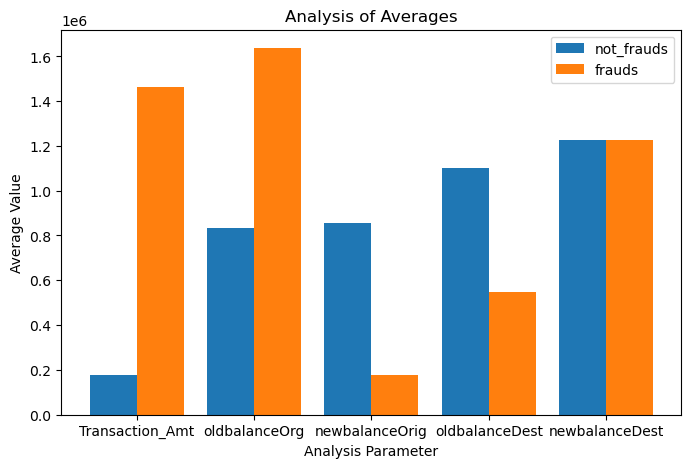

In [55]:
X = ['Transaction_Amt','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest'] 
not_frauds = [not_frauds_df['amount'].mean(), not_frauds_df['oldbalanceOrg'].mean(),not_frauds_df['newbalanceOrig'].mean(),not_frauds_df['oldbalanceDest'].mean(), not_frauds_df['newbalanceDest'].mean()] 
frauds = [frauds_df['amount'].mean(),frauds_df['oldbalanceOrg'].mean(),frauds_df['newbalanceOrig'].mean(),frauds_df['oldbalanceDest'].mean(), not_frauds_df['newbalanceDest'].mean()] 
  
X_axis = np.arange(len(X)) 
plt.figure(figsize=(8, 5))
plt.bar(X_axis - 0.2, not_frauds, 0.4, label = 'not_frauds') 
plt.bar(X_axis + 0.2, frauds, 0.4, label = 'frauds') 
plt.xticks(X_axis, X) 
plt.xlabel("Analysis Parameter") 
plt.ylabel("Average Value") 
plt.title("Analysis of Averages") 
plt.legend() 
plt.show() 

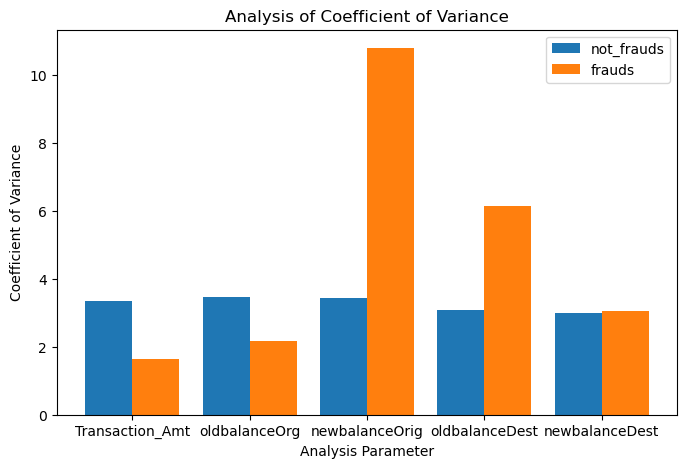

In [56]:
X = ['Transaction_Amt','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest'] 
not_frauds = [not_frauds_df['amount'].std()/not_frauds_df['amount'].mean(),
              not_frauds_df['oldbalanceOrg'].std()/not_frauds_df['oldbalanceOrg'].mean(),
              not_frauds_df['newbalanceOrig'].std()/not_frauds_df['newbalanceOrig'].mean(),
              not_frauds_df['oldbalanceDest'].std()/not_frauds_df['oldbalanceDest'].mean(), 
              not_frauds_df['newbalanceDest'].std()/not_frauds_df['newbalanceDest'].mean()
             ] 
frauds = [frauds_df['amount'].std()/frauds_df['amount'].mean(),
              frauds_df['oldbalanceOrg'].std()/frauds_df['oldbalanceOrg'].mean(),
              frauds_df['newbalanceOrig'].std()/frauds_df['newbalanceOrig'].mean(),
              frauds_df['oldbalanceDest'].std()/frauds_df['oldbalanceDest'].mean(), 
              frauds_df['newbalanceDest'].std()/frauds_df['newbalanceDest'].mean()
             ] 
  
X_axis = np.arange(len(X)) 
plt.figure(figsize=(8, 5))
plt.bar(X_axis - 0.2, not_frauds, 0.4, label = 'not_frauds') 
plt.bar(X_axis + 0.2, frauds, 0.4, label = 'frauds') 
plt.xticks(X_axis, X) 
plt.xlabel("Analysis Parameter") 
plt.ylabel("Coefficient of Variance") 
plt.title("Analysis of Coefficient of Variance") 
plt.legend() 
plt.show() 

## 3. Analyzing Fraudulent Customers

In [57]:
frauds_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,C,C
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,C,C
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,C,C
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,C,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,C,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,C,C


In [58]:
frauds_df.shape

(8197, 13)

In [59]:
frauds_df.groupby("type").count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
type,,,,,,,,,,,,
CASH_OUT,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116,4116
TRANSFER,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081,4081


## Data Cleaning

### Removing flagged rows

In [60]:
df = df[df['isFlaggedFraud'] !=1]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,C,M
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,C,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C,C


### Removing Merchants

In [61]:
df['destCustomerType'] = df['nameDest'].str[0]
df = df[df['destCustomerType'] != "M"]

df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orgCustomerType,destCustomerType
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C,C
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0,C,C
10,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.00,157982.12,0,0,C,C
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C,C


In [62]:
df['isFraud'].value_counts()

0    4202912
1       8197
Name: isFraud, dtype: int64

In [63]:
target_rate = df['isFraud'].mean() * 100
target_rate

0.19465181262228073

### Target rate is 0.19%

### Removing the aux columns

In [64]:
df = df.drop(['step', 'nameOrig', 'destCustomerType', 'nameDest', 'isFlaggedFraud'], axis=1)
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,C
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,C
9,DEBIT,5337.77,41720.00,36382.23,41898.00,40348.79,0,C
10,DEBIT,9644.94,4465.00,0.00,10845.00,157982.12,0,C
15,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0,C
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,C
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,C
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,C
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,C


In [65]:
# Replace values in the 'transaction_type' column
replacement_dict = {
    'TRANSFER': 2,
    'CASH_OUT': 4,
    'DEBIT': 6,
    'CASH_IN': 8
}

df['transaction_type'] = df['type'].replace(replacement_dict)
df = df.drop(['type'], axis=1)

df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type
2,181.00,181.00,0.00,0.00,0.00,1,C,2
3,181.00,181.00,0.00,21182.00,0.00,1,C,4
9,5337.77,41720.00,36382.23,41898.00,40348.79,0,C,6
10,9644.94,4465.00,0.00,10845.00,157982.12,0,C,6
15,229133.94,15325.00,0.00,5083.00,51513.44,0,C,4
...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,C,4
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,C,2
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,C,4
6362618,850002.52,850002.52,0.00,0.00,0.00,1,C,2


## Feature Generation

In [66]:
df['diff_newbalanceDest_oldbalanceDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['diff_newbalanceDest_newbalanceOrig'] = df['newbalanceDest'] - df['newbalanceOrig']
df['diff_newbalanceOrig_oldbalanceOrg'] = df['newbalanceOrig'] - df['oldbalanceOrg']

In [67]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
2,181.00,181.00,0.00,0.00,0.00,1,C,2,0.00,0.00,-181.00
3,181.00,181.00,0.00,21182.00,0.00,1,C,4,-21182.00,0.00,-181.00
9,5337.77,41720.00,36382.23,41898.00,40348.79,0,C,6,-1549.21,3966.56,-5337.77
10,9644.94,4465.00,0.00,10845.00,157982.12,0,C,6,147137.12,157982.12,-4465.00
15,229133.94,15325.00,0.00,5083.00,51513.44,0,C,4,46430.44,51513.44,-15325.00
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,C,4,339682.13,339682.13,-339682.13
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,C,2,0.00,0.00,-6311409.28
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,C,4,6311409.27,6379898.11,-6311409.28
6362618,850002.52,850002.52,0.00,0.00,0.00,1,C,2,0.00,0.00,-850002.52


In [68]:
df.to_csv("frauds_feats.csv", index=False)

## Data Splitting

In [69]:
df['isFraud'].value_counts()

0    4202912
1       8197
Name: isFraud, dtype: int64

In [70]:
not_frauds = df[df['isFraud']==0]
frauds = df[df['isFraud']==1]

In [71]:
not_frauds_test = not_frauds.sample(frac=0.2, random_state=1576023)
not_frauds_train = not_frauds.drop(not_frauds_test.index)

In [72]:
frauds_test = frauds.sample(frac=0.2, random_state=4014)
frauds_train = frauds.drop(frauds_test.index)

In [73]:
training_df = pd.concat([not_frauds_train, frauds_train], ignore_index=True)
training_df = training_df.sample(frac=1)

training_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
2718711,62499.47,0.00,0.00,8879615.73,8942115.21,0,C,4,62499.48,8942115.21,0.00
2912760,120488.82,4695253.15,4815741.97,832935.30,712446.48,0,C,8,-120488.82,-4103295.49,120488.82
2627675,338131.57,0.00,0.00,810907.87,1149039.44,0,C,4,338131.57,1149039.44,0.00
2032616,55673.92,61093.00,5419.08,730701.39,786375.31,0,C,4,55673.92,780956.23,-55673.92
284121,119629.15,3010.00,0.00,0.00,119629.15,0,C,4,119629.15,119629.15,-3010.00
...,...,...,...,...,...,...,...,...,...,...,...
1157103,94204.77,28123.48,0.00,1198981.50,1293186.27,0,C,4,94204.77,1293186.27,-28123.48
399672,403968.61,0.00,0.00,1109964.27,1513932.89,0,C,2,403968.62,1513932.89,0.00
1552551,315944.37,3016.00,0.00,670190.49,986134.86,0,C,4,315944.37,986134.86,-3016.00
647033,62442.20,5112276.51,5174718.71,425698.75,363256.55,0,C,8,-62442.20,-4811462.16,62442.20


In [74]:
out_of_sample_validation_df = pd.concat([not_frauds_test, frauds_test], ignore_index=True)
out_of_sample_validation_df = out_of_sample_validation_df.sample(frac=1)

out_of_sample_validation_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
286501,154984.40,144543.45,299527.86,1244827.23,1089842.83,0,C,8,-154984.40,790314.97,154984.41
465741,102179.95,25795.00,127974.95,297922.81,195742.86,0,C,8,-102179.95,67767.91,102179.95
113041,193003.77,22712.80,0.00,265335.38,458339.15,0,C,4,193003.77,458339.15,-22712.80
202936,3076.59,958752.73,961829.32,1183682.89,1180606.30,0,C,8,-3076.59,218776.98,3076.59
277944,245568.54,0.00,0.00,1466715.44,1712283.97,0,C,4,245568.53,1712283.97,0.00
...,...,...,...,...,...,...,...,...,...,...,...
151576,116319.29,17212831.21,17329150.51,8861581.51,8745262.22,0,C,8,-116319.29,-8583888.29,116319.30
750185,226883.90,10384.00,0.00,340540.79,567424.68,0,C,4,226883.89,567424.68,-10384.00
252233,193325.47,1442644.47,1635969.94,812593.27,619267.80,0,C,8,-193325.47,-1016702.14,193325.47
735351,44153.01,16217575.54,16261728.54,55431.63,11278.63,0,C,8,-44153.00,-16250449.91,44153.00


In [75]:
training_df.to_csv("frauds_training_data.csv", index=False)

In [76]:
out_of_sample_validation_df.to_csv("frauds_out_of_sample_validation_data.csv", index=False)

## Down Sampling

In [77]:
os.chdir('.')

file_path = "frauds_training_data.csv"
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='iso-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,62499.47,0.00,0.00,8879615.73,8942115.21,0,C,4,62499.48,8942115.21,0.00
1,120488.82,4695253.15,4815741.97,832935.30,712446.48,0,C,8,-120488.82,-4103295.49,120488.82
2,338131.57,0.00,0.00,810907.87,1149039.44,0,C,4,338131.57,1149039.44,0.00
3,55673.92,61093.00,5419.08,730701.39,786375.31,0,C,4,55673.92,780956.23,-55673.92
4,119629.15,3010.00,0.00,0.00,119629.15,0,C,4,119629.15,119629.15,-3010.00


In [78]:
df.shape

(3368888, 11)

In [79]:
df['isFraud'].value_counts()

0    3362330
1       6558
Name: isFraud, dtype: int64

### Downsampling the 0s for increasing the target rate

In [80]:
not_frauds = df[df['isFraud']==0]
frauds = df[df['isFraud']==1]

In [81]:
not_frauds = not_frauds.sample(n=125000, random_state=14896)
not_frauds

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
1390566,323939.69,10858.00,0.00,0.00,323939.69,0,C,4,323939.69,323939.69,-10858.00
175577,192611.32,0.00,0.00,722270.35,914881.67,0,C,4,192611.32,914881.67,0.00
1045878,565285.79,0.00,0.00,981717.66,1547003.45,0,C,2,565285.79,1547003.45,0.00
2284498,104756.17,0.00,0.00,4384302.49,4314677.99,0,C,4,-69624.50,4314677.99,0.00
47311,388047.37,0.00,0.00,447387.03,835434.40,0,C,4,388047.37,835434.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...
87754,62471.44,40998.00,0.00,0.00,62471.44,0,C,4,62471.44,62471.44,-40998.00
377487,41084.61,10999.00,0.00,47292.43,88377.05,0,C,4,41084.62,88377.05,-10999.00
3305228,85250.85,196243.99,110993.14,564357.43,649608.28,0,C,4,85250.85,538615.14,-85250.85
1746307,2004963.30,0.00,0.00,2840389.44,4845352.74,0,C,2,2004963.30,4845352.74,0.00


In [82]:
downsampled_training_df = pd.concat([not_frauds, frauds], ignore_index=True)
downsampled_training_df = downsampled_training_df.sample(frac=1)

downsampled_training_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
68240,93780.30,15111903.18,15205683.49,2681083.07,2587302.77,0,C,8,-93780.30,-12618380.72,93780.31
9313,160256.69,0.00,0.00,367154.71,527411.40,0,C,4,160256.69,527411.40,0.00
85974,77417.72,90755.66,13337.95,11636.00,0.00,0,C,2,-11636.00,-13337.95,-77417.71
83761,270031.56,150274.49,0.00,920127.61,1190159.18,0,C,2,270031.57,1190159.18,-150274.49
105789,88908.40,127553.00,216461.40,348962.04,260053.64,0,C,8,-88908.40,43592.24,88908.40
...,...,...,...,...,...,...,...,...,...,...,...
107306,78212.39,11403.00,89615.39,1596540.50,1518328.11,0,C,8,-78212.39,1428712.72,78212.39
30166,60793.95,42710.00,0.00,270439.52,333346.03,0,C,4,62906.51,333346.03,-42710.00
54226,170843.32,0.00,0.00,200303.94,371147.26,0,C,4,170843.32,371147.26,0.00
121386,35681.14,9412532.10,9448213.24,682786.15,647105.02,0,C,8,-35681.13,-8801108.22,35681.14


In [83]:
downsampled_training_df.to_csv("downsampled_training_df.csv", index=False)

In [84]:
os.chdir('.')

file_path = "downsampled_training_df.csv"
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='iso-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,93780.30,15111903.18,15205683.49,2681083.07,2587302.77,0,C,8,-93780.30,-12618380.72,93780.31
1,160256.69,0.00,0.00,367154.71,527411.40,0,C,4,160256.69,527411.40,0.00
2,77417.72,90755.66,13337.95,11636.00,0.00,0,C,2,-11636.00,-13337.95,-77417.71
3,270031.56,150274.49,0.00,920127.61,1190159.18,0,C,2,270031.57,1190159.18,-150274.49
4,88908.40,127553.00,216461.40,348962.04,260053.64,0,C,8,-88908.40,43592.24,88908.40


In [85]:
df.shape

(131558, 11)

In [86]:
df['isFraud'].value_counts()

0    125000
1      6558
Name: isFraud, dtype: int64

In [87]:
target_rate = df['isFraud'].mean() * 100
target_rate

4.984873591875827

In [88]:
features = df.drop(columns=['isFraud'])
targets = df['isFraud']

In [89]:
features

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,orgCustomerType,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,93780.30,15111903.18,15205683.49,2681083.07,2587302.77,C,8,-93780.30,-12618380.72,93780.31
1,160256.69,0.00,0.00,367154.71,527411.40,C,4,160256.69,527411.40,0.00
2,77417.72,90755.66,13337.95,11636.00,0.00,C,2,-11636.00,-13337.95,-77417.71
3,270031.56,150274.49,0.00,920127.61,1190159.18,C,2,270031.57,1190159.18,-150274.49
4,88908.40,127553.00,216461.40,348962.04,260053.64,C,8,-88908.40,43592.24,88908.40
...,...,...,...,...,...,...,...,...,...,...
131553,78212.39,11403.00,89615.39,1596540.50,1518328.11,C,8,-78212.39,1428712.72,78212.39
131554,60793.95,42710.00,0.00,270439.52,333346.03,C,4,62906.51,333346.03,-42710.00
131555,170843.32,0.00,0.00,200303.94,371147.26,C,4,170843.32,371147.26,0.00
131556,35681.14,9412532.10,9448213.24,682786.15,647105.02,C,8,-35681.13,-8801108.22,35681.14


In [90]:
targets

0         0
1         0
2         0
3         0
4         0
         ..
131553    0
131554    0
131555    0
131556    0
131557    0
Name: isFraud, Length: 131558, dtype: int64

### Low Variance Check

In [91]:
data_variance = features.var()
low_variance_threshold = 0.25
low_variance_columns = data_variance[data_variance < low_variance_threshold].index.tolist()

print("Variance of each column:\n", data_variance)
print("\nColumns with low variance:", low_variance_columns)

Variance of each column:
 amount                                8.264916e+11
oldbalanceOrg                         1.217013e+13
newbalanceOrig                        1.207664e+13
oldbalanceDest                        1.603929e+13
newbalanceDest                        1.838088e+13
transaction_type                      4.682594e+00
diff_newbalanceDest_oldbalanceDest    9.961237e+11
diff_newbalanceDest_newbalanceOrig    3.059086e+13
diff_newbalanceOrig_oldbalanceOrg     3.992779e+11
dtype: float64

Columns with low variance: []


C:\Users\mcsan\AppData\Local\Temp\ipykernel_3496\425552714.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_variance = features.var()


### All columns have passed the low variance check

### Correlation Check

In [92]:
correlation_matrix = features.corr()

correlation_matrix

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
amount,1.000000,0.081005,-0.034227,0.162546,0.335780,-0.201636,0.790139,0.281787,-0.635458
oldbalanceOrg,0.081005,1.000000,0.983540,0.019727,0.003230,0.427816,-0.065283,-0.615469,-0.111770
newbalanceOrig,-0.034227,0.983540,1.000000,0.026113,-0.004475,0.473177,-0.124005,-0.631784,0.069628
oldbalanceDest,0.162546,0.019727,0.026113,1.000000,0.973315,-0.023032,0.168303,0.738061,0.034702
newbalanceDest,0.335780,0.003230,-0.004475,0.973315,1.000000,-0.086396,0.390013,0.777964,-0.042442
transaction_type,-0.201636,0.427816,0.473177,-0.023032,-0.086396,1.000000,-0.278702,-0.364274,0.240383
diff_newbalanceDest_oldbalanceDest,0.790139,-0.065283,-0.124005,0.168303,0.390013,-0.278702,1.000000,0.380234,-0.321565
diff_newbalanceDest_newbalanceOrig,0.281787,-0.615469,-0.631784,0.738061,0.777964,-0.364274,0.380234,1.000000,-0.076647
diff_newbalanceOrig_oldbalanceOrg,-0.635458,-0.111770,0.069628,0.034702,-0.042442,0.240383,-0.321565,-0.076647,1.000000


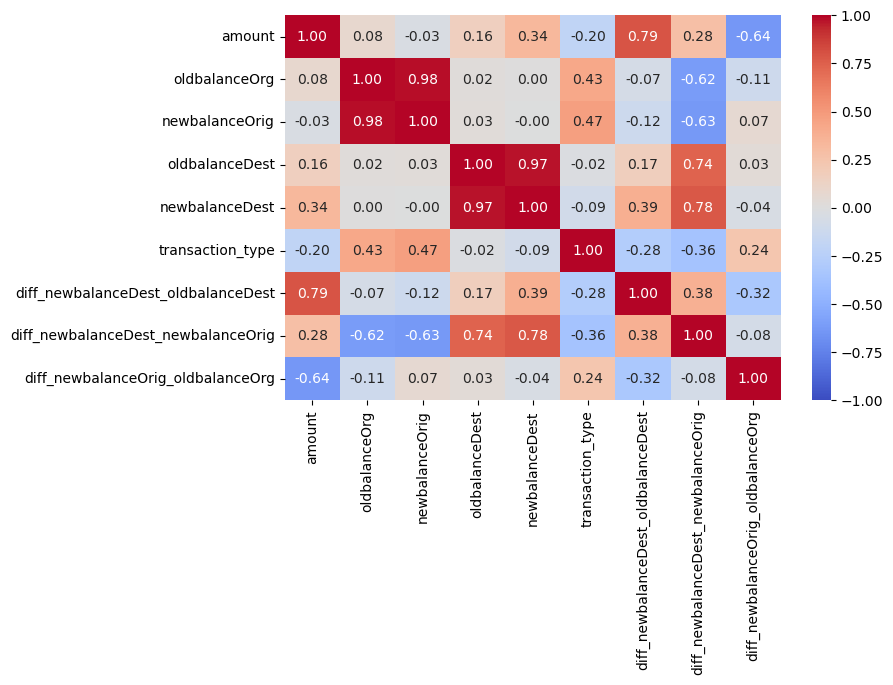

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Generate a heatmap with annotated values
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.show()

### Removing one of the features from pairs with correlation more than 0.85

In [94]:
drop_feats = ['orgCustomerType']
features = features.drop(columns=drop_feats)

features

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,93780.30,15111903.18,15205683.49,2681083.07,2587302.77,8,-93780.30,-12618380.72,93780.31
1,160256.69,0.00,0.00,367154.71,527411.40,4,160256.69,527411.40,0.00
2,77417.72,90755.66,13337.95,11636.00,0.00,2,-11636.00,-13337.95,-77417.71
3,270031.56,150274.49,0.00,920127.61,1190159.18,2,270031.57,1190159.18,-150274.49
4,88908.40,127553.00,216461.40,348962.04,260053.64,8,-88908.40,43592.24,88908.40
...,...,...,...,...,...,...,...,...,...
131553,78212.39,11403.00,89615.39,1596540.50,1518328.11,8,-78212.39,1428712.72,78212.39
131554,60793.95,42710.00,0.00,270439.52,333346.03,4,62906.51,333346.03,-42710.00
131555,170843.32,0.00,0.00,200303.94,371147.26,4,170843.32,371147.26,0.00
131556,35681.14,9412532.10,9448213.24,682786.15,647105.02,8,-35681.13,-8801108.22,35681.14


### Boruta Feature Selection

In [140]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

import numpy as np
np.int = int
np.float = float
np.bool = bool

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=2569)

# Initialize Boruta feature selector
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=742)

# Fit Boruta selector to the data
boruta_selector.fit(features.values, targets)

# Get the selected features
selected_features = features.columns[boruta_selector.support_]

print("Selected features:", selected_features)

Selected features: Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'transaction_type',
       'diff_newbalanceDest_oldbalanceDest',
       'diff_newbalanceDest_newbalanceOrig',
       'diff_newbalanceOrig_oldbalanceOrg'],
      dtype='object')


In [141]:
selected_features_df = features[selected_features]
selected_features_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,93780.30,15111903.18,15205683.49,2681083.07,2587302.77,8,-93780.30,-12618380.72,93780.31
1,160256.69,0.00,0.00,367154.71,527411.40,4,160256.69,527411.40,0.00
2,77417.72,90755.66,13337.95,11636.00,0.00,2,-11636.00,-13337.95,-77417.71
3,270031.56,150274.49,0.00,920127.61,1190159.18,2,270031.57,1190159.18,-150274.49
4,88908.40,127553.00,216461.40,348962.04,260053.64,8,-88908.40,43592.24,88908.40
...,...,...,...,...,...,...,...,...,...
131553,78212.39,11403.00,89615.39,1596540.50,1518328.11,8,-78212.39,1428712.72,78212.39
131554,60793.95,42710.00,0.00,270439.52,333346.03,4,62906.51,333346.03,-42710.00
131555,170843.32,0.00,0.00,200303.94,371147.26,4,170843.32,371147.26,0.00
131556,35681.14,9412532.10,9448213.24,682786.15,647105.02,8,-35681.13,-8801108.22,35681.14


In [142]:
processed_training_df = selected_features_df.join(targets)
processed_training_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg,isFraud
0,93780.30,15111903.18,15205683.49,2681083.07,2587302.77,8,-93780.30,-12618380.72,93780.31,0
1,160256.69,0.00,0.00,367154.71,527411.40,4,160256.69,527411.40,0.00,0
2,77417.72,90755.66,13337.95,11636.00,0.00,2,-11636.00,-13337.95,-77417.71,0
3,270031.56,150274.49,0.00,920127.61,1190159.18,2,270031.57,1190159.18,-150274.49,0
4,88908.40,127553.00,216461.40,348962.04,260053.64,8,-88908.40,43592.24,88908.40,0
...,...,...,...,...,...,...,...,...,...,...
131553,78212.39,11403.00,89615.39,1596540.50,1518328.11,8,-78212.39,1428712.72,78212.39,0
131554,60793.95,42710.00,0.00,270439.52,333346.03,4,62906.51,333346.03,-42710.00,0
131555,170843.32,0.00,0.00,200303.94,371147.26,4,170843.32,371147.26,0.00,0
131556,35681.14,9412532.10,9448213.24,682786.15,647105.02,8,-35681.13,-8801108.22,35681.14,0


In [143]:
processed_training_df.to_csv("processed_training_df.csv", index=False)

## Modelling

In [144]:
os.chdir('.')

file_path = "processed_training_df.csv"
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='iso-8859-1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp1252')

df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg,isFraud
0,93780.30,15111903.18,15205683.49,2681083.07,2587302.77,8,-93780.30,-12618380.72,93780.31,0
1,160256.69,0.00,0.00,367154.71,527411.40,4,160256.69,527411.40,0.00,0
2,77417.72,90755.66,13337.95,11636.00,0.00,2,-11636.00,-13337.95,-77417.71,0
3,270031.56,150274.49,0.00,920127.61,1190159.18,2,270031.57,1190159.18,-150274.49,0
4,88908.40,127553.00,216461.40,348962.04,260053.64,8,-88908.40,43592.24,88908.40,0


In [131]:
df.shape

(131558, 10)

In [132]:
df['isFraud'].value_counts()

0    125000
1      6558
Name: isFraud, dtype: int64

In [170]:
X_train = df.drop(columns=['isFraud'])
y_train = df['isFraud']

In [171]:
validation_df = pd.read_csv("frauds_out_of_sample_validation_data.csv")
validation_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orgCustomerType,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,154984.40,144543.45,299527.86,1244827.23,1089842.83,0,C,8,-154984.40,790314.97,154984.41
1,102179.95,25795.00,127974.95,297922.81,195742.86,0,C,8,-102179.95,67767.91,102179.95
2,193003.77,22712.80,0.00,265335.38,458339.15,0,C,4,193003.77,458339.15,-22712.80
3,3076.59,958752.73,961829.32,1183682.89,1180606.30,0,C,8,-3076.59,218776.98,3076.59
4,245568.54,0.00,0.00,1466715.44,1712283.97,0,C,4,245568.53,1712283.97,0.00
...,...,...,...,...,...,...,...,...,...,...,...
842216,116319.29,17212831.21,17329150.51,8861581.51,8745262.22,0,C,8,-116319.29,-8583888.29,116319.30
842217,226883.90,10384.00,0.00,340540.79,567424.68,0,C,4,226883.89,567424.68,-10384.00
842218,193325.47,1442644.47,1635969.94,812593.27,619267.80,0,C,8,-193325.47,-1016702.14,193325.47
842219,44153.01,16217575.54,16261728.54,55431.63,11278.63,0,C,8,-44153.00,-16250449.91,44153.00


In [172]:
validation_df['isFraud'].value_counts()

0    840582
1      1639
Name: isFraud, dtype: int64

In [173]:
validation_df['isFraud'].mean()

0.0019460450404347554

In [174]:
validation_df = validation_df.drop(columns=['orgCustomerType'])
validation_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,154984.40,144543.45,299527.86,1244827.23,1089842.83,0,8,-154984.40,790314.97,154984.41
1,102179.95,25795.00,127974.95,297922.81,195742.86,0,8,-102179.95,67767.91,102179.95
2,193003.77,22712.80,0.00,265335.38,458339.15,0,4,193003.77,458339.15,-22712.80
3,3076.59,958752.73,961829.32,1183682.89,1180606.30,0,8,-3076.59,218776.98,3076.59
4,245568.54,0.00,0.00,1466715.44,1712283.97,0,4,245568.53,1712283.97,0.00
...,...,...,...,...,...,...,...,...,...,...
842216,116319.29,17212831.21,17329150.51,8861581.51,8745262.22,0,8,-116319.29,-8583888.29,116319.30
842217,226883.90,10384.00,0.00,340540.79,567424.68,0,4,226883.89,567424.68,-10384.00
842218,193325.47,1442644.47,1635969.94,812593.27,619267.80,0,8,-193325.47,-1016702.14,193325.47
842219,44153.01,16217575.54,16261728.54,55431.63,11278.63,0,8,-44153.00,-16250449.91,44153.00


In [175]:
X_test = validation_df.drop(columns=['isFraud'])
y_test = validation_df['isFraud']

In [176]:
X_test

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,transaction_type,diff_newbalanceDest_oldbalanceDest,diff_newbalanceDest_newbalanceOrig,diff_newbalanceOrig_oldbalanceOrg
0,154984.40,144543.45,299527.86,1244827.23,1089842.83,8,-154984.40,790314.97,154984.41
1,102179.95,25795.00,127974.95,297922.81,195742.86,8,-102179.95,67767.91,102179.95
2,193003.77,22712.80,0.00,265335.38,458339.15,4,193003.77,458339.15,-22712.80
3,3076.59,958752.73,961829.32,1183682.89,1180606.30,8,-3076.59,218776.98,3076.59
4,245568.54,0.00,0.00,1466715.44,1712283.97,4,245568.53,1712283.97,0.00
...,...,...,...,...,...,...,...,...,...
842216,116319.29,17212831.21,17329150.51,8861581.51,8745262.22,8,-116319.29,-8583888.29,116319.30
842217,226883.90,10384.00,0.00,340540.79,567424.68,4,226883.89,567424.68,-10384.00
842218,193325.47,1442644.47,1635969.94,812593.27,619267.80,8,-193325.47,-1016702.14,193325.47
842219,44153.01,16217575.54,16261728.54,55431.63,11278.63,8,-44153.00,-16250449.91,44153.00


### Normalization

In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

### Isolation Forest

In [195]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Train Isolation Forest model
model = IsolationForest(contamination=0.05)
model.fit(X_train)

IsolationForest(contamination=0.05)

In [196]:
# Predict anomalies
predictions = model.predict(X_test)

# Convert Isolation Forest predictions to match true labels
# For Isolation Forest, -1 indicates anomaly and 1 indicates normal. Convert to 0 and 1 for true labels
predictions = (predictions == -1).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")

Accuracy: 0.9034
Precision: 0.0056
Recall: 0.2752
AUC: 0.5899


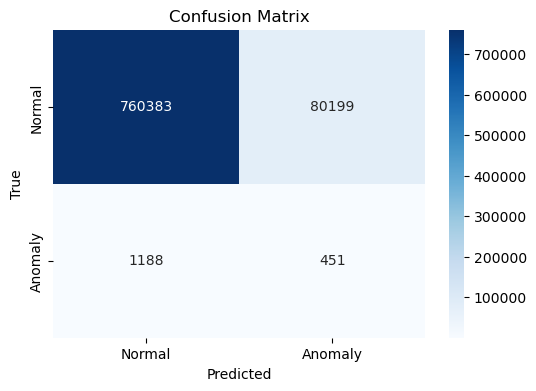

In [197]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### One Class SVM

In [181]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(nu=0.05)
model.fit(X_train)

OneClassSVM(nu=0.05)

In [182]:
# Predict anomalies
predictions = model.predict(X_test)

predictions = (predictions == -1).astype(int)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")

Accuracy: 0.7591
Precision: 0.0045
Recall: 0.5534
AUC: 0.6564


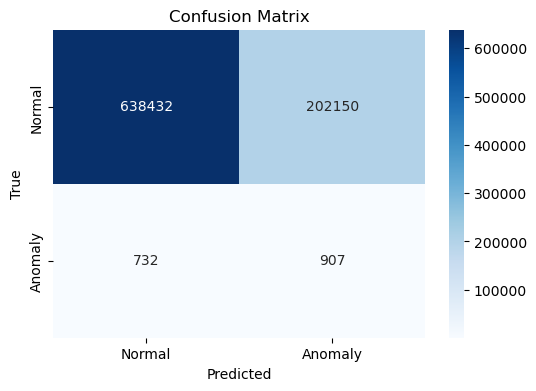

In [183]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Autoencoder Neural Network

In [198]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from scipy.sparse import issparse

# Convert to numpy arrays and ensure correct type
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Convert sparse matrices to dense arrays if necessary
if issparse(X_train):
    X_train = X_train.toarray()
if issparse(X_test):
    X_test = X_test.toarray()

# Check for NaNs and Infinities
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# Define autoencoder model
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Fit the model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.3077 - val_loss: 0.1738
Epoch 2/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1762 - val_loss: 0.1720
Epoch 3/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.1754 - val_loss: 0.1722
Epoch 4/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1748 - val_loss: 0.1724
Epoch 5/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.1748 - val_loss: 0.1723
Epoch 6/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1749 - val_loss: 0.1722
Epoch 7/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1749 - val_loss: 0.1723
Epoch 8/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1748 - val_loss: 0.1722
Epoch 9/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1749 - val_loss: 0.1722
Epoch 10/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1748 - val_loss: 0.1723
Epoch 11/50
514/514 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1748 - val_loss: 0.1722
Epoch 12/50
514/514 ━━━━━━━━━━━━━━━━━━

In [199]:
test_reconstructions = autoencoder.predict(X_test)
test_errors = np.mean(np.square(X_test - test_reconstructions), axis=1)
error_threshold = 0.01

anomaly_predictions = (test_errors > error_threshold).astype(int)

26320/26320 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step


In [200]:
anomaly_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [201]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Compute metrics
accuracy = accuracy_score(y_test, anomaly_predictions)
precision = precision_score(y_test, anomaly_predictions)
recall = recall_score(y_test, anomaly_predictions)
roc_auc = roc_auc_score(y_test, anomaly_predictions)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")

Accuracy: 0.9980
Precision: 0.2321
Recall: 0.0079
AUC: 0.5039


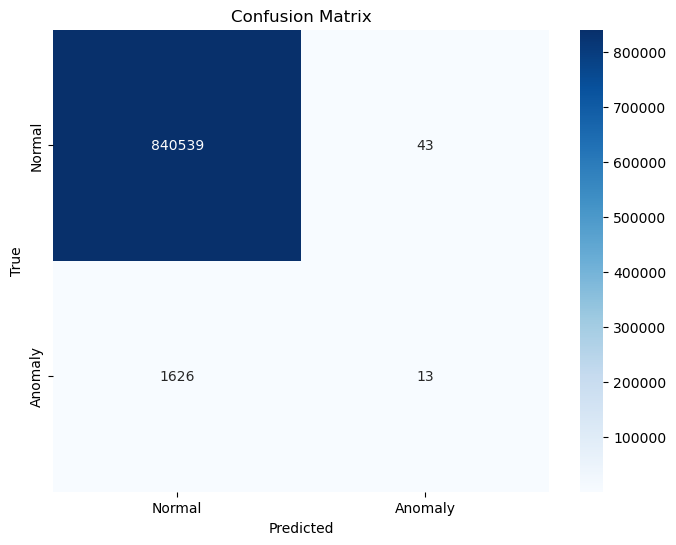

In [202]:
# Compute confusion matrix
cm = confusion_matrix(y_test, anomaly_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Elliptic Envelope

In [203]:
from sklearn.covariance import EllipticEnvelope

# Fit the Elliptic Envelope model
envelope = EllipticEnvelope(contamination=0.05)
envelope.fit(X_train)

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.450747992064066 > -187.905558166980995). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.172276740733338 > -188.188653704665228). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.106691919258026 > -188.688268485129413). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-188.004640009236965 > -188.922691108567079). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-187.614000783895619 > -189.857903435748199). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.379773437815658 > -189.686676821593096). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.741397405774222 > -188.048140611374833). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.944945703134238 > -189.033950111107544). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.996869907883109 > -188.975338065757001). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-187.529922681071696 > -187.644982139960888). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-188.390805337383256 > -188.819834181947357). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-187.317352713275795 > -189.712931233383927). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.961770860262760 > -188.738569667224112). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.933625213605183 > -188.037051630251170). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.521280026179454 > -185.514940728246586). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-188.156047997887782 > -188.534557736222723). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-182.929178452612462 > -187.739957086036895). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.516827711242513 > -188.006876937088236). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.714786900423007 > -189.095192447751288). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-187.581330360925932 > -188.128980428604166). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.575872466574538 > -189.324604348426305). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.750212648551951 > -186.953050195104538). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-189.309526703179216 > -190.154784042244216). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-189.050892301957248 > -190.075210458998328). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.020861847742793 > -215.304267635267990). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.130837066106665 > -215.556206658067282). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-194.405880245665742 > -217.661612325259568). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-199.150220438907269 > -218.128041011564193). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-192.557602764384114 > -215.881913771175277). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.774031337710824 > -216.051351175515720). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-194.181693957635275 > -217.086190038346530). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-192.029173598199918 > -216.337745827735716). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.989736623616409 > -187.687706398377770). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.079305460480498 > -186.115264471525137). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-176.801061127531256 > -186.932432497097409). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-176.164043502513721 > -186.642603680181765). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.342848755464757 > -186.120375455762399). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-187.140159069037963 > -187.691832570771027). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.031289161654058 > -186.083579327216597). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.774031337710824 > -216.342130049989521). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.993027981387115 > -186.140671445422157). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.051023446305265 > -186.086607766353211). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.604476742193526 > -216.062698276234329). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-188.482768206251961 > -188.610383116702479). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.731287667034138 > -187.099342150820149). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.266360187158455 > -215.556938892662316). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-176.145488976028872 > -187.036886181470607). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.774719445716187 > -216.174780828911310). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-189.002201738951129 > -189.691987346672221). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.496978496565930 > -187.363633291353239). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.860202295168392 > -184.905243094171851). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-179.494880336553365 > -187.433035120844579). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-177.282008615456164 > -186.946738040827739). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-181.195748149303455 > -187.741462255299410). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.156821110869799 > -186.185250764180637). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.657517219955992 > -216.168717676316760). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-176.847989766478690 > -187.006726931929705). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.907652411781953 > -186.137156566592552). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.898631728105812 > -186.023841654077017). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.566175401320692 > -186.253356758251954). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.986590753868711 > -186.084216074119865). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.066263871381096 > -215.568338107662555). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-190.970392281063795 > -215.434790057317230). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.321976770752855 > -186.720080498607786). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.797209672144561 > -187.727816136397252). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-192.363175120482481 > -215.919921613200358). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.910188251690499 > -186.972248722680291). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-175.429358010687793 > -186.626069408086863). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-193.503956628073865 > -216.679458984208111). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-177.725955844025464 > -187.015018811527398). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.096001453186943 > -186.209564162084035). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-192.280178944505309 > -216.126541342281342). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-192.684753966408863 > -215.951511565179231). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-193.592988648288809 > -216.775927269231602). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.172671844076973 > -187.576580579122947). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.804817110148747 > -188.267749976870903). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.989524035971129 > -185.995092688720661). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.428322095808994 > -186.097058812688203). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.726684500284421 > -185.930970035189347). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.984991888639058 > -186.002928032506560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-183.691422214833977 > -185.406362915182854). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.020653609712838 > -186.071594302005622). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.941601010512869 > -186.004385753456319). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.954549801737357 > -186.414534204632901). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-192.679320245030056 > -216.467906593616078). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.696688104258641 > -186.983876787370605). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.865137500544563 > -186.025290129126660). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.629642659958535 > -216.112021806678655). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.931569398519855 > -186.112185444508981). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-187.393083190790946 > -188.292795370275769). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-177.645089832335401 > -186.234591863894167). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.728099096141250 > -186.101132086373866). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-186.104878877219363 > -186.348752513898489). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-192.754075990538411 > -216.536725915540160). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.033874110810928 > -215.955135884524879). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-190.847119243625770 > -215.121769884461401). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.622006421281696 > -186.118633658614471). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.420475567867243 > -186.163037290557668). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-183.813876083457870 > -188.338945281572933). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-185.051405059219348 > -186.163685534516077). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.405717176731855 > -185.063853568122852). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-178.037926551428598 > -187.440620325024469). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-184.466366610072583 > -185.685929470250500). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-189.954073418365454 > -215.289286885924440). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-191.629642659958535 > -216.083236123820882). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-177.056895037919105 > -187.103128014289069). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-175.956953376755905 > -186.709413225301347). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-175.829553485896838 > -186.408937234012825). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C

C:\Users\mcsan\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-198.693046570618179 > -217.919594973336615). You may want to try with a higher value of support_fraction (current value: 0.500).
  warnings.warn(


EllipticEnvelope(contamination=0.05)

In [204]:
# Predict anomalies
y_pred = envelope.predict(X_test)

# Convert predictions to 0 for normal and 1 for anomaly
y_pred = (y_pred == -1).astype(int)

In [205]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")

Accuracy: 0.9324
Precision: 0.0003
Recall: 0.0092
AUC: 0.4717
